# MultiClass Classification

### Data Gathering

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('obesity_dataset.csv');

In [3]:
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
print(data.shape)  #display the dataset dimension

(2111, 17)


In [5]:
data.dtypes  #display the data types

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [6]:
data.info()  #display the data structures

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [7]:
data.describe()  #display the summarized info of dataset

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


We need to transform the categorical values into numbers by using the label encoder package from sklearn.

### Data preprocessing

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
numerical_features = ['Age', 'Height', 'Weight']
for feature in numerical_features:
    scaler = MinMaxScaler()
    data[[feature]] = scaler.fit_transform(data[[feature]])
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,0.148936,Female,0.320755,0.186567,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,0.148936,Female,0.132075,0.126866,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,0.191489,Male,0.660377,0.283582,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,0.276596,Male,0.660377,0.358209,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,0.170213,Male,0.622642,0.379104,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
categorical_features = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight','CAEC', 'MTRANS', 'NObeyesdad']
for feature in categorical_features:
    encoder = LabelEncoder()
    data[feature] = encoder.fit_transform(data[feature])
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,0.148936,0,0.320755,0.186567,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3,1
1,0.148936,0,0.132075,0.126866,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3,1
2,0.191489,1,0.660377,0.283582,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3,1
3,0.276596,1,0.660377,0.358209,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4,5
4,0.170213,1,0.622642,0.379104,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3,6


In [11]:
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

In [12]:
X.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,0.148936,0,0.320755,0.186567,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3
1,0.148936,0,0.132075,0.126866,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3
2,0.191489,1,0.660377,0.283582,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3
3,0.276596,1,0.660377,0.358209,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4
4,0.170213,1,0.622642,0.379104,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3


In [13]:
y.head()  #display y

0    1
1    1
2    1
3    5
4    6
Name: NObeyesdad, dtype: int32

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [15]:
X_train.shape, y_train.shape  #display X_train and y_train shape

((1477, 16), (1477,))

In [16]:
X_test.shape, y_test.shape  #display X_test and y_test shape

((634, 16), (634,))

In [17]:
X_train.head()  #display the X_train

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
412,0.404255,1,0.754717,0.343284,2,1,2.000000,3.000000,0,0,2.000000,0,1.000000,0.000000,1,0
651,0.160201,0,0.268640,0.037384,3,0,3.000000,1.612747,0,0,2.566629,0,1.190465,0.000000,1,3
1460,0.191489,1,0.551887,0.492751,2,1,2.393837,3.000000,0,0,2.014990,1,0.978815,0.413220,2,3
1419,0.378373,1,0.420677,0.380597,2,1,2.949242,1.782109,0,0,2.210997,1,1.992719,0.000000,2,0
1433,0.176753,0,0.293387,0.324840,3,1,2.049112,2.622055,0,0,2.280555,1,2.052896,0.896185,2,3


In [18]:
y_train.head()

412     1
651     0
1460    2
1419    2
1433    2
Name: NObeyesdad, dtype: int32

In [19]:
X_test.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
1730,0.353099,1,0.869192,0.673378,2,1,2.497548,3.000000,0,0,1.362583,1,1.144076,0.173232,2,3
259,0.085106,0,0.415094,0.388060,2,1,1.000000,3.000000,0,0,1.000000,1,0.000000,1.000000,1,3
966,0.322424,1,0.610672,0.358733,3,1,1.595746,3.618722,0,0,1.274389,0,1.504003,0.370067,2,0
1911,0.091800,0,0.557740,0.705632,2,1,3.000000,3.000000,0,0,2.923792,1,1.536555,0.625350,2,3
1815,0.101511,0,0.559721,0.707464,2,1,3.000000,3.000000,0,0,2.869234,1,1.465931,0.627886,2,3


In [20]:
y_test.head()

1730    3
259     2
966     5
1911    4
1815    4
Name: NObeyesdad, dtype: int32

In [21]:
X_train.isnull().sum()  #check x_train for null values

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
dtype: int64

In [22]:
y_train.isnull().sum()  #check y_train for null values

0

In [23]:
X_test.isnull().sum()  #check x_test for null values

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
dtype: int64

In [24]:
y_test.isnull().sum()  #check y_test for null values

0

### Model Training

In [25]:
#import libraries to build the gradient boosting and fit the model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3,random_state=0)
gb_classifier.fit(X_train, y_train)

#make predictions and store data for later
y_pred_gb = gb_classifier.predict(X_test)

#get the accuracy score
acc_gb = round(accuracy_score(y_test,y_pred_gb)*100,2)

In [26]:
#import libraries to build the decision tree model and fit the model
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

#make predictions and store data for later
y_pred_dt = dt_classifier.predict(X_test)

#get the accuracy score
acc_dt = round(accuracy_score(y_test,y_pred_dt)*100,2)

In [27]:
#import libraries to build the knn model and fit in the train data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)

#make predictions and store data for later
y_pred_knn = knn.predict(X_test) 

#get the accuracy score
acc_knn = round(accuracy_score(y_test,y_pred_knn)*100,2)

In [28]:
#import libraries to build the random forest model and fit in the train data
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

#make predictions and store data for later
y_pred_rf = rf.predict(X_test)

#get the accuracy score
acc_rf = round(accuracy_score(y_test,y_pred_rf)*100,2)

In [29]:
#import libraries to build the Naive Bayes model and fit in the train data
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() 
gnb.fit(X_train, y_train)  

#make predictions and store data for later
y_pred_gnb = gnb.predict(X_test)  

#get the accuracy score
acc_gnb = round(accuracy_score(y_test,y_pred_gnb)*100,2)

In [30]:
#import libraries for SVM
from sklearn.svm import SVC

svm_classifier = SVC(C=100,kernel='rbf',gamma=1)     
svm_classifier.fit(X_train,y_train)

#make predictions and store data for later
y_pred_svm = svm_classifier.predict(X_test)

#get the accuracy score
acc_svm = round(accuracy_score(y_test,y_pred_svm)*100,2)

In [31]:
#display the accuracy results
results = pd.DataFrame({
    'Model': ['Gradient Boosting','Decision Tree', 'K Nearest Neighbors', 
              'Random Forest', 'Naive Bayes','Support Vector Machine'],
    'Score': [acc_gb, acc_dt, acc_knn, 
              acc_rf, acc_gnb, acc_svm]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(6)

,Model
Score,
96.21,Random Forest
94.16,Gradient Boosting
93.06,Decision Tree
82.33,Support Vector Machine
76.50,K Nearest Neighbors
58.52,Naive Bayes


In [32]:
y_pred_gb  #display prediction

array([3, 2, 5, 4, 4, 3, 0, 4, 2, 3, 4, 2, 5, 2, 1, 2, 5, 4, 6, 6, 4, 3,
       2, 6, 2, 3, 4, 6, 5, 3, 5, 6, 6, 2, 3, 5, 6, 0, 5, 0, 5, 6, 0, 5,
       4, 3, 2, 0, 4, 0, 5, 3, 3, 5, 2, 2, 5, 5, 3, 1, 2, 1, 2, 0, 0, 3,
       1, 5, 5, 2, 6, 4, 3, 2, 2, 1, 2, 5, 3, 0, 6, 5, 2, 1, 6, 1, 1, 3,
       4, 3, 5, 0, 0, 3, 6, 4, 2, 3, 3, 3, 1, 2, 0, 5, 4, 2, 6, 4, 6, 6,
       0, 5, 2, 1, 2, 6, 2, 2, 6, 0, 2, 4, 0, 0, 4, 6, 2, 5, 6, 5, 1, 0,
       1, 2, 6, 4, 5, 3, 4, 3, 6, 6, 1, 0, 0, 1, 6, 6, 2, 0, 6, 5, 4, 4,
       4, 2, 2, 1, 3, 5, 2, 4, 6, 4, 0, 0, 3, 2, 5, 4, 5, 3, 4, 5, 5, 3,
       2, 0, 1, 3, 5, 2, 4, 4, 4, 0, 5, 5, 3, 4, 2, 6, 3, 6, 1, 4, 3, 3,
       2, 1, 1, 1, 5, 5, 2, 6, 2, 2, 2, 0, 5, 1, 1, 3, 3, 6, 1, 4, 6, 4,
       3, 2, 1, 0, 4, 4, 1, 6, 5, 0, 4, 4, 5, 4, 0, 3, 1, 6, 2, 4, 2, 0,
       4, 4, 1, 1, 0, 4, 6, 5, 2, 5, 6, 4, 5, 4, 1, 4, 2, 1, 4, 1, 1, 1,
       0, 2, 3, 0, 1, 4, 6, 2, 4, 1, 2, 2, 1, 1, 1, 6, 2, 1, 0, 1, 6, 1,
       2, 4, 6, 4, 4, 3, 1, 4, 4, 5, 0, 1, 4, 4, 0,

In [33]:
y_test  #display actual values

1730    3
259     2
966     5
1911    4
1815    4
       ..
1592    3
731     0
1700    3
1442    2
171     1
Name: NObeyesdad, Length: 634, dtype: int32

In [34]:
#import libraries for root-mean-square error
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math

#display the root-mean-square error
MSE=np.square(np.subtract(y_test,y_pred_gb)).mean()
RMSE = (math.sqrt(MSE) * 100) 
print(RMSE)

73.98098485336497


In [44]:
#import libraries for confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gnb) 

print ("Confusion Matrix : \n", cm)  #display confusion matrix of multi class classification

Confusion Matrix : 
 [[ 89   1   0   0   0   0   0]
 [ 70   6   2   0   1   6   2]
 [  0   2  79  18   1   1   2]
 [  0   0  13  75   0   0   2]
 [  0   1   0   0 100   0   0]
 [ 23   5  39   0   0  12   2]
 [  8   4  46  10   0   4  10]]


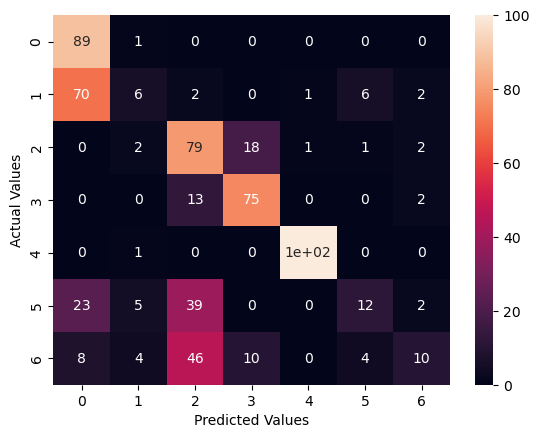

In [45]:
import seaborn as sns  #import package for plotting
import matplotlib.pyplot as plt

#confusion matrix
cm = pd.crosstab(y_test, y_pred_gnb, rownames=['Actual Values'], colnames=['Predicted Values'])
sns.heatmap(cm, annot=True)
plt.show()